<a href="https://colab.research.google.com/github/AYNovoselov/Sleep_Efficiency/blob/main/Sleep_Efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Предобработка данных**

##1. Загрузка и обзор данных

Мы импортировали основные библиотеки pandas и numpy, затем загрузили датасет Sleep Efficiency Dataset с Kaggle.
Посмотрели первые, последние и случайные строки для общего представления о содержании данных.

##2. Информация о структуре

Изучили типы данных, количество ненулевых значений и использование памяти с помощью df.info().
Это помогает оценить, какие признаки числовые, категориальные, временные, и где могут быть пропуски.

##3. Приведение названий к единому стилю

Названия столбцов приведены к «змеиному регистру» (snake_case) для удобства работы и единообразия.

##4. Проверка и обработка пропусков

Для каждого столбца посчитано количество и процент пропусков.
Пропуски в числовых признаках заполнены медианой, чтобы сохранить распределение данных.
Пропуски в категориальных признаках заполнены модой (наиболее частым значением).

##5. Преобразование типов данных

Привели временные поля (bedtime, wakeup_time) к типу datetime.
Категориальные признаки (gender, smoking_status, caffeine_consumed, alcohol_consumed) преобразованы к типу category.
Это уменьшает использование памяти и повышает читаемость анализа.

##6. Работа с дубликатами

Выполнен поиск дубликатов методом df.duplicated().
После этого проверяем размер датафрейма и типы данных.

In [ ]:
import pandas as pd
import numpy as np

# Загружаем датасет
df = pd.read_csv("/content/drive/MyDrive/Sleep_Efficiency.csv")

# 2. Общая информация о датасете

# Первые строки
display(df.head())

# Последние строки
display(df.tail())

# Случайная выборка
display(df.sample(5, random_state=42))

# Информация о датасете
df.info()

# Количество ненулевых значений
display(df.count())

# Использование памяти
df.memory_usage(deep=True)

# 3. Проверка наименований столбцов и приведение к snake_case

print("Исходные названия столбцов:\n", df.columns.tolist())

# Приведение к нижнему регистру и snake_case
df.columns = (
    df.columns.str.strip()
              .str.lower()
              .str.replace(' ', '_')
              .str.replace('-', '_')
)

print("Преобразованные названия столбцов:\n", df.columns.tolist())


# 4. Проверка на пропуски

missing = df.isna().sum()
missing_percent = df.isna().mean() * 100
print("Пропуски:\n", pd.concat([missing, missing_percent], axis=1, keys=['count', 'percent']))

#Заполнение пропусков
# Заполняем числовые признаки медианой, категориальные — модой
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

# Проверяем, что пропусков нет
df.isna().sum()


# 5. Изменение типов данных

# Преобразуем временные признаки
time_cols = ['bedtime', 'wakeup_time']
for col in time_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Преобразуем категориальные признаки
cat_cols = ['gender', 'smoking_status', 'caffeine_consumed', 'alcohol_consumed']
for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

df.info()

# 6. Поиск и удаление дубликатов

duplicates = df.duplicated().sum()
print(f"Количество дубликатов: {duplicates}")

# Если есть — удаляем
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("Дубликаты удалены.")

print("Финальные размеры датафрейма:", df.shape)
print("Типы данных после преобразования:")
print(df.dtypes)

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.000,0.880,18,70,12,0.000,0.000,0.000,Yes,3.000
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.000,0.660,19,28,53,3.000,0.000,3.000,Yes,3.000
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.000,0.890,20,70,10,1.000,0.000,0.000,No,3.000
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.000,0.510,23,25,52,3.000,50.000,5.000,Yes,1.000
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.000,0.760,27,55,18,3.000,0.000,3.000,No,3.000


,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.500,0.910,22,57,21,0.000,0.000,0.000,No,5.000
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.000,0.740,28,57,15,4.000,25.000,0.000,No,3.000
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.500,0.550,20,32,48,1.000,NaN,3.000,Yes,0.000
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.000,0.760,18,72,10,3.000,0.000,0.000,No,3.000
451,452,18,Male,2021-03-17 02:30:00,2021-03-17 10:00:00,7.500,0.630,22,23,55,1.000,50.000,0.000,No,1.000


,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
299,300,22,Male,2021-04-24 21:30:00,2021-04-24 05:30:00,8.000,0.600,27,20,53,4.000,0.000,4.000,No,3.000
39,40,58,Female,2021-03-26 02:00:00,2021-03-26 09:00:00,7.000,0.630,22,23,55,3.000,50.000,3.000,No,0.000
336,337,50,Female,2021-07-20 22:00:00,2021-07-20 05:00:00,7.000,0.900,22,58,20,1.000,0.000,NaN,No,5.000
332,333,12,Female,2021-11-01 01:00:00,2021-11-01 10:00:00,9.000,0.560,18,35,47,1.000,0.000,0.000,No,0.000
153,154,41,Male,2021-07-01 02:30:00,2021-07-01 10:00:00,7.500,0.700,22,59,19,3.000,0.000,0.000,No,3.000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

,0
ID,452
Age,452
Gender,452
Bedtime,452
Wakeup time,452
Sleep duration,452
Sleep efficiency,452
REM sleep percentage,452
Deep sleep percentage,452
Light sleep percentage,452


Исходные названия столбцов:
 ['ID', 'Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration', 'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage', 'Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Smoking status', 'Exercise frequency']
Преобразованные названия столбцов:
 ['id', 'age', 'gender', 'bedtime', 'wakeup_time', 'sleep_duration', 'sleep_efficiency', 'rem_sleep_percentage', 'deep_sleep_percentage', 'light_sleep_percentage', 'awakenings', 'caffeine_consumption', 'alcohol_consumption', 'smoking_status', 'exercise_frequency']
Пропуски:
                         count  percent
id                          0    0.000
age                         0    0.000
gender                      0    0.000
bedtime                     0    0.000
wakeup_time                 0    0.000
sleep_duration              0    0.000
sleep_efficiency            0    0.000
rem_sleep_percentage        0    0.000
deep_sleep_percentage       0    0.000
light_

/tmp/ipython-input-1021932988.py:54: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-1021932988.py:52: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

#**Исследовательский анализ данных**

##1. Индексация по координатам

В этой секции мы демонстрируем различные способы доступа к данным по позициям и по меткам:

iloc — позиционная индексация (по индексам строк и номерам столбцов),

iat/at — быстрый доступ к скалярным значениям,

loc — если потребуется по меткам индекса/названиям колонок.

Цель — показать, как извлечь отдельные наблюдения или срезы для ручной проверки.

##2. Логическая индексация

Используем булевы маски для отбора наблюдений по бизнес-правилам:

возрастные сегменты,

пол + низкая эффективность,

сочетание фаз сна и пробуждений,

активность и отсутствие курения,

вредные привычки (кофеин/алкоголь).

Это помогает быстро найти целевые группы для дальнейшего анализа/интервенций.

##3. Сортировка и анализ экстремумов

Сортируем по эффективности сна, количеству пробуждений, длительности сна и потреблению кофеина.
Анализируем топ-и дно-наблюдения для поиска шаблонов: кто в группе риска (низкая эффективность), есть ли системные факторы (много пробуждений, высокий кофеин и т.п.).

##4. query() — фильтрация

Демонстрируем 5 практичных запросов .query(), отвечающих бизнес-задаче (например, молодые с плохим сном; курящие с низкой эффективностью; активные с высокой эффективностью).
engine='python' используется там, где нужны выражения с методами строк (str.lower()).

##5. where() — маскирование

.where() маскирует все значения, не удовлетворяющие условию (ставит NaN). После этого удобно вызвать .dropna(how='all') чтобы убрать полностью пустые строки и получить таблицу только с подходящими записями. Примеры полезны там, где хочется сохранить исходную структуру, но выделить блок.

##6. Сводные таблицы (pivot_table)

Строим минимум три сводные таблицы:

по полу (gender) — средняя эффективность;

по статусу курения и частоте упражнений — средняя длительность и эффективность;

по возрастным группам — средние потребление кофеина/алкоголя и эффективность.

Эти таблицы дают представление о целевых группах и позволяют формировать рекомендации.

##7. groupby + agg

Группируем и вычисляем агрегаты (count, mean, min, max) для gender, smoking_status, age_group. Это показывает разброс по группам и указывает, где целесообразно вмешательство (например, возрастная группа с наименьшей эффективностью).

##8. Дополнительный анализ

Смотрим корреляции числовых признаков с sleep_efficiency. Строим scatter plot длительности сна против эффективности, boxplot зависимости эффективности от числа пробуждений и гистограмму распределения efficiency. Это помогает увидеть закономерности и выбросы.

Колонки: ['id', 'age', 'gender', 'bedtime', 'wakeup_time', 'sleep_duration', 'sleep_efficiency', 'rem_sleep_percentage', 'deep_sleep_percentage', 'light_sleep_percentage', 'awakenings', 'caffeine_consumption', 'alcohol_consumption', 'smoking_status', 'exercise_frequency']
Размер: (452, 15)


,id,age,gender,bedtime,wakeup_time,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.000,0.880,18,70,12,0.000,0.000,0.000,Yes,3.000
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.000,0.660,19,28,53,3.000,0.000,3.000,Yes,3.000
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.000,0.890,20,70,10,1.000,0.000,0.000,No,3.000



Индексация по координатам (iloc / loc по индексам и at / iat)

1) df.iloc[0] — первая строка


,0
id,1
age,65
gender,Female
bedtime,2021-03-06 01:00:00
wakeup_time,2021-03-06 07:00:00
sleep_duration,6.000
sleep_efficiency,0.880
rem_sleep_percentage,18
deep_sleep_percentage,70
light_sleep_percentage,12



2) df.iloc[10:20, 1:6] — строки 10-19, столбцы 1-5 (по позиции)


,age,gender,bedtime,wakeup_time,sleep_duration
10,50,Male,2021-02-28 00:30:00,2021-02-28 08:30:00,8.000
11,55,Male,2021-03-10 22:30:00,2021-03-10 06:00:00,7.500
12,30,Female,2021-08-07 02:30:00,2021-08-07 11:30:00,9.000
13,28,Male,2021-02-25 01:00:00,2021-02-25 09:30:00,8.500
14,36,Female,2021-07-03 01:30:00,2021-07-03 10:00:00,8.500
15,32,Female,2021-12-06 22:00:00,2021-12-06 05:30:00,7.500
16,21,Female,2021-03-24 01:00:00,2021-03-24 08:00:00,7.000
17,40,Female,2021-08-27 23:00:00,2021-08-27 06:30:00,7.500
18,43,Female,2021-07-27 00:00:00,2021-07-27 09:00:00,9.000
19,52,Male,2021-12-03 00:30:00,2021-12-03 07:30:00,7.000



3) df.iloc[[0,5,10],[0,2,4]] — выбор отдельных ячеек по позициям


,id,gender,wakeup_time
0,1,Female,2021-03-06 07:00:00
5,6,Female,2021-07-01 04:30:00
10,11,Male,2021-02-28 08:30:00



4) df.at[df.index[100], 'age'] — возраст в строке с индексом 100
age @ idx100 = 38

5) df.iat[200, df.columns.get_loc('sleep_efficiency')] — значение эффективности сна в позиции (200, sleep_efficiency)
value = 0.73

6) df.loc[df.index[0:4], ['id','gender','sleep_efficiency']] — несколько строк по индексным меткам


,id,gender,sleep_efficiency
0,1,Female,0.880
1,2,Male,0.660
2,3,Female,0.890
3,4,Female,0.510



7) df.iloc[-5:, :] — последние 5 строк


,id,age,gender,bedtime,wakeup_time,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.500,0.910,22,57,21,0.000,0.000,0.000,No,5.000
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.000,0.740,28,57,15,4.000,25.000,0.000,No,3.000
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.500,0.550,20,32,48,1.000,25.000,3.000,Yes,0.000
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.000,0.760,18,72,10,3.000,0.000,0.000,No,3.000
451,452,18,Male,2021-03-17 02:30:00,2021-03-17 10:00:00,7.500,0.630,22,23,55,1.000,50.000,0.000,No,1.000



Логическая индексация 

1) age > 60: count = 31


,id,age,gender,bedtime,wakeup_time,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.000,0.880,18,70,12,0.000,0.000,0.000,Yes,3.000
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.000,0.660,19,28,53,3.000,0.000,3.000,Yes,3.000
23,24,63,Female,2021-05-21 02:30:00,2021-05-21 10:30:00,8.000,0.980,22,65,13,0.000,50.000,0.000,No,1.000
35,36,61,Female,2021-10-19 01:00:00,2021-10-19 08:00:00,7.000,0.640,23,22,55,2.000,50.000,3.000,No,0.000
51,52,65,Male,2021-08-27 02:30:00,2021-08-27 10:00:00,7.500,0.710,22,59,19,2.000,50.000,2.000,No,3.000



2) female & sleep_efficiency < 75: count = 224


,id,age,gender,bedtime,wakeup_time,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.000,0.880,18,70,12,0.000,0.000,0.000,Yes,3.000
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.000,0.890,20,70,10,1.000,0.000,0.000,No,3.000
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.000,0.510,23,25,52,3.000,50.000,5.000,Yes,1.000
5,6,36,Female,2021-07-01 21:00:00,2021-07-01 04:30:00,7.500,0.900,23,60,17,0.000,25.000,0.000,No,1.000
6,7,27,Female,2021-07-21 21:00:00,2021-07-21 03:00:00,6.000,0.540,28,25,47,2.000,50.000,0.000,Yes,1.000



3) rem>25 & awakenings>3: count = 15


,id,age,gender,bedtime,wakeup_time,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency
13,14,28,Male,2021-02-25 01:00:00,2021-02-25 09:30:00,8.500,0.640,28,25,47,4.000,0.000,0.000,No,3.000
16,17,21,Female,2021-03-24 01:00:00,2021-03-24 08:00:00,7.000,0.540,28,22,50,4.000,0.000,2.000,Yes,0.000
37,38,20,Female,2021-09-05 00:00:00,2021-09-05 09:00:00,9.000,0.820,26,56,18,4.000,25.000,0.000,No,1.000
59,60,34,Female,2021-08-08 21:00:00,2021-08-08 04:30:00,7.500,0.800,28,60,12,4.000,50.000,0.000,No,1.000
89,90,24,Female,2021-11-26 00:00:00,2021-11-26 07:30:00,7.500,0.770,26,56,18,4.000,25.000,0.000,No,1.000



4) exercise>=3 & smoking_status=='no': count = 123


,id,age,gender,bedtime,wakeup_time,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.000,0.890,20,70,10,1.000,0.000,0.000,No,3.000
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.000,0.760,27,55,18,3.000,0.000,3.000,No,3.000
11,12,55,Male,2021-03-10 22:30:00,2021-03-10 06:00:00,7.500,0.930,18,60,22,0.000,0.000,0.000,No,3.000
13,14,28,Male,2021-02-25 01:00:00,2021-02-25 09:30:00,8.500,0.640,28,25,47,4.000,0.000,0.000,No,3.000
15,16,32,Female,2021-12-06 22:00:00,2021-12-06 05:30:00,7.500,0.920,25,55,20,0.000,50.000,2.000,No,5.000



5) caffeine>150 or alcohol>2: count = 105


,id,age,gender,bedtime,wakeup_time,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.000,0.660,19,28,53,3.000,0.000,3.000,Yes,3.000
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.000,0.510,23,25,52,3.000,50.000,5.000,Yes,1.000
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.000,0.760,27,55,18,3.000,0.000,3.000,No,3.000
21,22,32,Male,2021-06-14 02:30:00,2021-06-14 10:00:00,7.500,0.710,23,58,19,3.000,50.000,4.000,No,1.000
24,25,24,Male,2021-09-16 00:00:00,2021-09-16 07:00:00,7.000,0.880,15,75,10,1.000,25.000,5.000,No,2.000



6) sleep_duration < 5 — count: 0

7) light_sleep_percentage > mean(24.56) — count: 114

Сортировки и анализ наибольших/наименьших значений

Топ-5 по sleep_efficiency:


,id,age,gender,sleep_duration,sleep_efficiency
56,57,54,Male,8.000,0.990
18,19,43,Female,9.000,0.980
23,24,63,Female,8.000,0.980
282,283,53,Male,7.000,0.980
206,207,31,Female,7.000,0.980



Худшие 5 по sleep_efficiency:


,id,age,gender,sleep_duration,sleep_efficiency
446,447,23,Male,7.000,0.500
272,273,58,Male,9.000,0.500
325,326,52,Female,7.000,0.500
326,327,29,Female,7.500,0.500
203,204,38,Male,8.000,0.500



Топ-5 по awakenings:


,id,age,gender,awakenings,sleep_efficiency
420,421,55,Male,4.000,0.510
421,422,44,Male,4.000,0.790
422,423,41,Female,4.000,0.800
417,418,44,Male,4.000,0.660
386,387,62,Female,4.000,0.620



Топ-5 по caffeine_consumption:


,id,age,gender,caffeine_consumption,sleep_efficiency
62,63,29,Male,200.000,0.810
96,97,41,Male,200.000,0.960
81,82,29,Male,200.000,0.810
161,162,42,Male,200.000,0.950
111,112,25,Male,100.000,0.900



Короткий сон — 5 самых маленьких sleep_duration:


,id,age,gender,sleep_duration,sleep_efficiency
391,392,37,Female,5.000,0.520
367,368,56,Male,5.000,0.740
305,306,65,Male,5.000,0.900
213,214,29,Female,5.000,0.860
232,233,36,Female,5.000,0.870



Фильтрация с .query()

1) Молодые взрослые (18-30) с efficiency < 80 — count: 127


,id,age,gender,bedtime,wakeup_time,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency
6,7,27,Female,2021-07-21 21:00:00,2021-07-21 03:00:00,6.000,0.540,28,25,47,2.000,50.000,0.000,Yes,1.000
12,13,30,Female,2021-08-07 02:30:00,2021-08-07 11:30:00,9.000,0.930,24,58,18,0.000,50.000,0.000,No,1.000
13,14,28,Male,2021-02-25 01:00:00,2021-02-25 09:30:00,8.500,0.640,28,25,47,4.000,0.000,0.000,No,3.000
16,17,21,Female,2021-03-24 01:00:00,2021-03-24 08:00:00,7.000,0.540,28,22,50,4.000,0.000,2.000,Yes,0.000
20,21,24,Male,2021-05-02 00:00:00,2021-05-02 08:00:00,8.000,0.830,15,75,10,3.000,0.000,0.000,No,2.000



2) Мужчины, sleep_duration >= 7 — count: 203


,id,age,gender,bedtime,wakeup_time,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.000,0.660,19,28,53,3.000,0.000,3.000,Yes,3.000
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.000,0.760,27,55,18,3.000,0.000,3.000,No,3.000
7,8,53,Male,2021-08-16 00:30:00,2021-08-16 10:30:00,10.000,0.900,28,52,20,0.000,50.000,0.000,Yes,3.000
10,11,50,Male,2021-02-28 00:30:00,2021-02-28 08:30:00,8.000,0.920,23,57,20,1.000,50.000,0.000,Yes,3.000
11,12,55,Male,2021-03-10 22:30:00,2021-03-10 06:00:00,7.500,0.930,18,60,22,0.000,0.000,0.000,No,3.000



3) Курящие с efficiency < 75 — count: 154


,id,age,gender,bedtime,wakeup_time,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.000,0.880,18,70,12,0.000,0.000,0.000,Yes,3.000
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.000,0.660,19,28,53,3.000,0.000,3.000,Yes,3.000
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.000,0.510,23,25,52,3.000,50.000,5.000,Yes,1.000
6,7,27,Female,2021-07-21 21:00:00,2021-07-21 03:00:00,6.000,0.540,28,25,47,2.000,50.000,0.000,Yes,1.000
7,8,53,Male,2021-08-16 00:30:00,2021-08-16 10:30:00,10.000,0.900,28,52,20,0.000,50.000,0.000,Yes,3.000



4) Частые занятия (>=3) и высокая эффективность (>=85) — count: 0


,id,age,gender,bedtime,wakeup_time,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency



5) Большой кофеин (>200) или алкоголь (>3) — count: 53


,id,age,gender,bedtime,wakeup_time,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.000,0.510,23,25,52,3.000,50.000,5.000,Yes,1.000
21,22,32,Male,2021-06-14 02:30:00,2021-06-14 10:00:00,7.500,0.710,23,58,19,3.000,50.000,4.000,No,1.000
24,25,24,Male,2021-09-16 00:00:00,2021-09-16 07:00:00,7.000,0.880,15,75,10,1.000,25.000,5.000,No,2.000
32,33,26,Male,2021-03-26 00:00:00,2021-03-26 07:00:00,7.000,0.550,23,23,54,3.000,0.000,4.000,Yes,0.000
49,50,37,Female,2021-04-10 21:30:00,2021-04-10 04:30:00,7.000,0.810,25,55,20,1.000,0.000,5.000,No,4.000



Фильтрация с .where()

where1: sleep_efficiency >= 80 — count: 0


,id,age,gender,bedtime,wakeup_time,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency



where2: awakenings <= 1 — count: 269


,id,age,gender,bedtime,wakeup_time,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency
0,1.000,65.000,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.000,0.880,18.000,70.000,12.000,0.000,0.000,0.000,Yes,3.000
2,3.000,40.000,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.000,0.890,20.000,70.000,10.000,1.000,0.000,0.000,No,3.000
5,6.000,36.000,Female,2021-07-01 21:00:00,2021-07-01 04:30:00,7.500,0.900,23.000,60.000,17.000,0.000,25.000,0.000,No,1.000
7,8.000,53.000,Male,2021-08-16 00:30:00,2021-08-16 10:30:00,10.000,0.900,28.000,52.000,20.000,0.000,50.000,0.000,Yes,3.000
10,11.000,50.000,Male,2021-02-28 00:30:00,2021-02-28 08:30:00,8.000,0.920,23.000,57.000,20.000,1.000,50.000,0.000,Yes,3.000



where3: caffeine_consumption <= 50 — count: 422


,id,age,gender,bedtime,wakeup_time,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency
0,1.000,65.000,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.000,0.880,18.000,70.000,12.000,0.000,0.000,0.000,Yes,3.000
1,2.000,69.000,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.000,0.660,19.000,28.000,53.000,3.000,0.000,3.000,Yes,3.000
2,3.000,40.000,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.000,0.890,20.000,70.000,10.000,1.000,0.000,0.000,No,3.000
3,4.000,40.000,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.000,0.510,23.000,25.000,52.000,3.000,50.000,5.000,Yes,1.000
4,5.000,57.000,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.000,0.760,27.000,55.000,18.000,3.000,0.000,3.000,No,3.000



where4: exercise_frequency == 0 — count: 116


,id,age,gender,bedtime,wakeup_time,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency
9,10.000,11.000,Female,2021-09-16 01:00:00,2021-09-16 10:00:00,9.000,0.550,18.000,37.000,45.000,4.000,0.000,0.000,No,0.000
14,15.000,36.000,Female,2021-07-03 01:30:00,2021-07-03 10:00:00,8.500,0.540,20.000,32.000,48.000,2.000,25.000,1.000,Yes,0.000
16,17.000,21.000,Female,2021-03-24 01:00:00,2021-03-24 08:00:00,7.000,0.540,28.000,22.000,50.000,4.000,0.000,2.000,Yes,0.000
18,19.000,43.000,Female,2021-07-27 00:00:00,2021-07-27 09:00:00,9.000,0.980,20.000,67.000,13.000,0.000,25.000,1.000,No,0.000
31,32.000,18.000,Male,2021-05-24 00:30:00,2021-05-24 08:30:00,8.000,0.680,22.000,30.000,48.000,3.000,25.000,0.000,No,0.000



where5: rem>=20 & deep>=15 — count: 378


,id,age,gender,bedtime,wakeup_time,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency
2,3.000,40.000,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.000,0.890,20.000,70.000,10.000,1.000,0.000,0.000,No,3.000
3,4.000,40.000,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.000,0.510,23.000,25.000,52.000,3.000,50.000,5.000,Yes,1.000
4,5.000,57.000,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.000,0.760,27.000,55.000,18.000,3.000,0.000,3.000,No,3.000
5,6.000,36.000,Female,2021-07-01 21:00:00,2021-07-01 04:30:00,7.500,0.900,23.000,60.000,17.000,0.000,25.000,0.000,No,1.000
6,7.000,27.000,Female,2021-07-21 21:00:00,2021-07-21 03:00:00,6.000,0.540,28.000,25.000,47.000,2.000,50.000,0.000,Yes,1.000



Сводные таблицы

1) Средняя/медиана/количество по gender:


/tmp/ipython-input-1726115560.py:169: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot1 = pd.pivot_table(df, index='gender', values='sleep_efficiency', aggfunc=['mean','count','median'])
/tmp/ipython-input-1726115560.py:169: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot1 = pd.pivot_table(df, index='gender', values='sleep_efficiency', aggfunc=['mean','count','median'])
/tmp/ipython-input-1726115560.py:169: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot1 = pd.pivot_table(df, index='gender', 

,mean,count,median
,sleep_efficiency,sleep_efficiency,sleep_efficiency
gender,,,
Female,0.788,224,0.815
Male,0.790,228,0.830



2) Mean sleep_duration и sleep_efficiency по smoking_status x exercise_frequency:


/tmp/ipython-input-1726115560.py:174: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot2 = pd.pivot_table(df, index='smoking_status', columns='exercise_frequency',


sleep_duration                                \
exercise_frequency          0.000 1.000 2.000 3.000 4.000 5.000   
smoking_status                                                    
No                          7.559 7.375 7.382 7.579 7.237 7.429   
Yes                         7.694 7.500 7.212 7.444 7.000 8.000   

                   sleep_efficiency                                
exercise_frequency            0.000 1.000 2.000 3.000 4.000 5.000  
smoking_status                                                     
No                            0.766 0.801 0.822 0.837 0.890 0.899  
Yes                           0.682 0.738 0.785 0.745 0.520 0.520


3) Среднее caffeine/alcohol/efficiency по age_group:


/tmp/ipython-input-1726115560.py:181: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot3 = pd.pivot_table(df, index='age_group', values=['caffeine_consumption','alcohol_consumption','sleep_efficiency'], aggfunc='mean')


,alcohol_consumption,caffeine_consumption,sleep_efficiency
age_group,,,
<=25,1.239,20.070,0.746
26-40,1.024,33.232,0.791
41-60,1.145,17.608,0.808
61+,1.452,18.548,0.761



Доп. pivot: median awakenings по gender x age_group:


/tmp/ipython-input-1726115560.py:186: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot4 = pd.pivot_table(df, index='gender', columns='age_group', values='awakenings', aggfunc='median')


age_group,<=25,26-40,41-60,61+
gender,,,,
Female,2.000,1.000,1.000,2.000
Male,2.000,1.000,1.000,1.500



GroupBy + agg

1) По gender:


/tmp/ipython-input-1726115560.py:196: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gb1 = df.groupby('gender').agg(


,gender,count,mean_eff,min_eff,max_eff,mean_awakenings
0,Female,224,0.788,0.500,0.980,1.513
1,Male,228,0.790,0.500,0.990,1.711



2) По smoking_status:


/tmp/ipython-input-1726115560.py:207: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gb2 = df.groupby('smoking_status').agg(


,smoking_status,count,mean_eff,mean_caff,mean_alc
0,No,298,0.817,23.574,1.054
1,Yes,154,0.734,24.026,1.299



3) По age_group:


/tmp/ipython-input-1726115560.py:217: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gb3 = df.groupby('age_group').agg(


,age_group,count,mean_duration,mean_eff,mean_awakenings
0,<=25,71,7.585,0.746,1.958
1,26-40,164,7.482,0.791,1.439
2,41-60,186,7.390,0.808,1.581
3,61+,31,7.565,0.761,1.935



Доп. анализ: корреляции и графики

Корреляционная матрица (числовые признаки):


,id,age,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,exercise_frequency
id,1.000,0.021,0.014,-0.026,0.052,-0.047,0.036,-0.058,-0.058,0.108,0.025
age,0.021,1.000,-0.062,0.098,0.042,0.022,-0.032,-0.017,-0.169,0.052,0.071
sleep_duration,0.014,-0.062,1.000,-0.027,-0.016,-0.037,0.042,-0.001,-0.015,-0.044,-0.067
sleep_efficiency,-0.026,0.098,-0.027,1.000,0.062,0.787,-0.819,-0.552,0.063,-0.381,0.258
rem_sleep_percentage,0.052,0.042,-0.016,0.062,1.000,-0.208,-0.017,-0.027,0.058,-0.047,0.029
deep_sleep_percentage,-0.047,0.022,-0.037,0.787,-0.208,1.000,-0.974,-0.295,0.001,-0.356,0.179
light_sleep_percentage,0.036,-0.032,0.042,-0.819,-0.017,-0.974,1.000,0.307,-0.015,0.375,-0.190
awakenings,-0.058,-0.017,-0.001,-0.552,-0.027,-0.295,0.307,1.000,-0.108,0.189,-0.216
caffeine_consumption,-0.058,-0.169,-0.015,0.063,0.058,0.001,-0.015,-0.108,1.000,-0.118,-0.062
alcohol_consumption,0.108,0.052,-0.044,-0.381,-0.047,-0.356,0.375,0.189,-0.118,1.000,-0.004



Абсолютная корреляция с sleep_efficiency:


,sleep_efficiency
sleep_efficiency,1.000
light_sleep_percentage,0.819
deep_sleep_percentage,0.787
awakenings,0.552
alcohol_consumption,0.381
exercise_frequency,0.258
age,0.098
caffeine_consumption,0.063
rem_sleep_percentage,0.062
sleep_duration,0.027


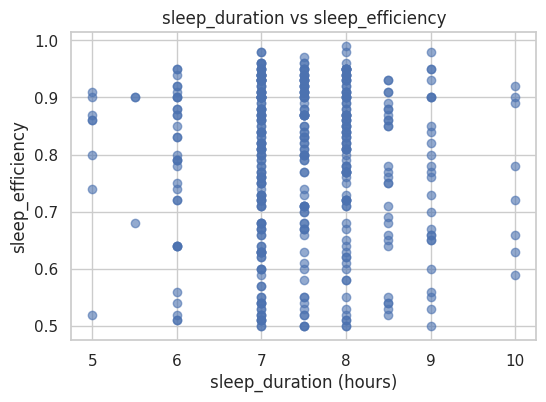

<Figure size 800x500 with 0 Axes>

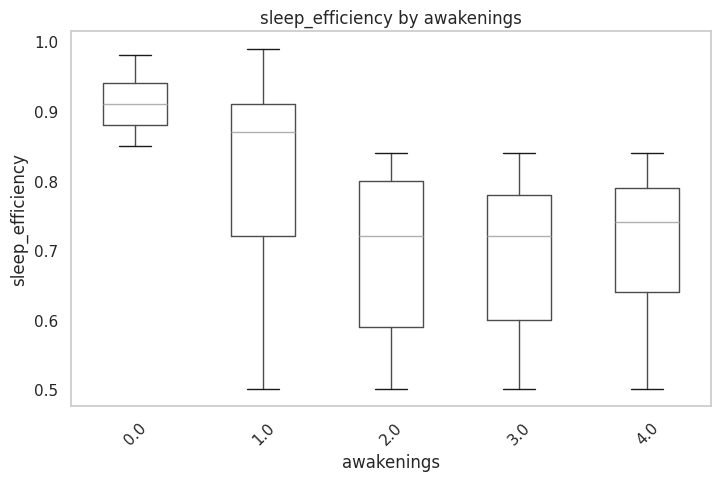

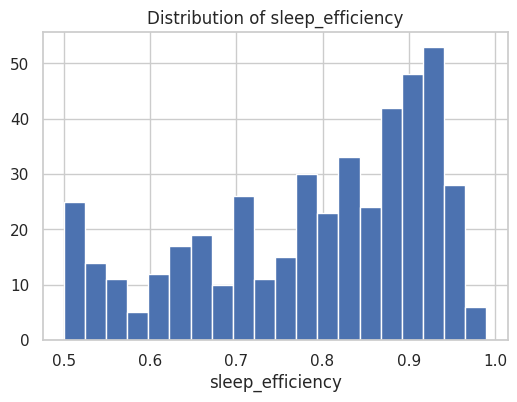

Количество наблюдений: 452
Средняя sleep_efficiency по всему датасету: 0.79
Корреляция sleep_efficiency с sleep_duration: -0.03
Корреляция sleep_efficiency с awakenings: -0.55
Корреляция sleep_efficiency с caffeine_consumption: 0.06


In [ ]:
# EDA: индексирование, фильтры, сводные таблицы, groupby

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Колонки:", df.columns.tolist())
print("Размер:", df.shape)
display(df.head(3))

# 1) Индексация по координатам

print("\nИндексация по координатам (iloc / loc по индексам и at / iat)")

# Первую строку (по позиции)
print("\n1) df.iloc[0] — первая строка")
display(df.iloc[0])

# Срез строк 10:20 и столбцов 1:5 (по позиции)
print("\n2) df.iloc[10:20, 1:6] — строки 10-19, столбцы 1-5 (по позиции)")
display(df.iloc[10:20, 1:6])

# Конкретные строки по списку позиций и конкретные колонки (используем .iloc с numpy)
print("\n3) df.iloc[[0,5,10],[0,2,4]] — выбор отдельных ячеек по позициям")
display(df.iloc[[0,5,10],[0,2,4]])

# Доступ к ячейке по метке индекса и по названию столбца (.at)
print("\n4) df.at[df.index[100], 'age'] — возраст в строке с индексом 100")
print("age @ idx100 =", df.at[df.index[100], 'age'])

# Быстрый доступ к скалярной ячейке (.iat)
print("\n5) df.iat[200, df.columns.get_loc('sleep_efficiency')] — значение эффективности сна в позиции (200, sleep_efficiency)")
print("value =", df.iat[200, df.columns.get_loc('sleep_efficiency')])

# .loc по индексному значению: строки с индексами 0..3
print("\n6) df.loc[df.index[0:4], ['id','gender','sleep_efficiency']] — несколько строк по индексным меткам")
display(df.loc[df.index[0:4], ['id','gender','sleep_efficiency']])

# tail с iloc: последние 5 строк по позициям
print("\n7) df.iloc[-5:, :] — последние 5 строк")
display(df.iloc[-5:, :])

# 2) Логическая индексация

print("\nЛогическая индексация ")

# Люди старше 60 лет
mask1 = df['age'] > 60
print("\n1) age > 60: count =", mask1.sum())
display(df[mask1].head())

# Женщины c низкой эффективностью сна (efficiency < 75)
mask2 = (df['gender'].str.lower() == 'female') & (df['sleep_efficiency'] < 75)
print("\n2) female & sleep_efficiency < 75: count =", mask2.sum())
display(df[mask2].head())

# Высокая доля REM (>25%) и много пробуждений (>3)
mask3 = (df['rem_sleep_percentage'] > 25) & (df['awakenings'] > 3)
print("\n3) rem>25 & awakenings>3: count =", mask3.sum())
display(df[mask3].head())

# Активные (exercise_frequency >= 3) и без курения
mask4 = (df['exercise_frequency'] >= 3) & (df['smoking_status'].str.lower() == 'no')
print("\n4) exercise>=3 & smoking_status=='no': count =", mask4.sum())
display(df[mask4].head())

# Большой кофеин (>150 mg) или алкоголь >2 (если измерено в порциях) — предположим шкала
mask5 = (df['caffeine_consumption'] > 150) | (df['alcohol_consumption'] > 2)
print("\n5) caffeine>150 or alcohol>2: count =", mask5.sum())
display(df[mask5].head())

# Низкая sleep_duration < 5 часов
print("\n6) sleep_duration < 5 — count:", (df['sleep_duration'] < 5).sum())

# Показываем строки, где light_sleep_percentage выше среднего
mean_light = df['light_sleep_percentage'].mean()
print("\n7) light_sleep_percentage > mean({:.2f}) — count:".format(mean_light), (df['light_sleep_percentage'] > mean_light).sum())


# 3) Сортировка (по разным столбцам) и анализ экстремумов

print("\nСортировки и анализ наибольших/наименьших значений")

# Сортировка по sleep_efficiency по убыванию (топ-5 лучших по эффективности)
top5_eff = df.sort_values(by='sleep_efficiency', ascending=False).head(5)
print("\nТоп-5 по sleep_efficiency:")
display(top5_eff[['id','age','gender','sleep_duration','sleep_efficiency']])

# Сортировка по sleep_efficiency по возрастанию (5 худших)
bot5_eff = df.sort_values(by='sleep_efficiency', ascending=True).head(5)
print("\nХудшие 5 по sleep_efficiency:")
display(bot5_eff[['id','age','gender','sleep_duration','sleep_efficiency']])

# Сортировка по awakenings (наибольшее количество пробуждений)
top_awaken = df.sort_values(by='awakenings', ascending=False).head(5)
print("\nТоп-5 по awakenings:")
display(top_awaken[['id','age','gender','awakenings','sleep_efficiency']])

# Сортировка по caffeine_consumption
top_caff = df.sort_values(by='caffeine_consumption', ascending=False).head(5)
print("\nТоп-5 по caffeine_consumption:")
display(top_caff[['id','age','gender','caffeine_consumption','sleep_efficiency']])

# Сортировка по sleep_duration (короткий сон)
short_sleep = df.sort_values(by='sleep_duration', ascending=True).head(5)
print("\nКороткий сон — 5 самых маленьких sleep_duration:")
display(short_sleep[['id','age','gender','sleep_duration','sleep_efficiency']])


# 4) Фильтрация с использованием query

print("\nФильтрация с .query()")

q1 = df.query("age >= 18 and age <= 30 and sleep_efficiency < 80")
print("\n1) Молодые взрослые (18-30) с efficiency < 80 — count:", len(q1))
display(q1.head())

q2 = df.query("gender.str.lower() == 'male' and sleep_duration >= 7", engine='python')
print("\n2) Мужчины, sleep_duration >= 7 — count:", len(q2))
display(q2.head())

q3 = df.query("smoking_status.str.lower() == 'yes' and sleep_efficiency < 75", engine='python')
print("\n3) Курящие с efficiency < 75 — count:", len(q3))
display(q3.head())

q4 = df.query("exercise_frequency >= 3 and sleep_efficiency >= 85")
print("\n4) Частые занятия (>=3) и высокая эффективность (>=85) — count:", len(q4))
display(q4.head())

q5 = df.query("caffeine_consumption > 200 or alcohol_consumption > 3")
print("\n5) Большой кофеин (>200) или алкоголь (>3) — count:", len(q5))
display(q5.head())


# 5) Фильтрация с использованием where
print("\nФильтрация с .where()")

# where 1: все строки, где sleep_efficiency >= 80
w1 = df.where(df['sleep_efficiency'] >= 80).dropna(how='all')
print("\nwhere1: sleep_efficiency >= 80 — count:", len(w1))
display(w1.head())

# where 2: awakenings <= 1 (спящие без пробуждений/с 0-1 пробуждением)
w2 = df.where(df['awakenings'] <= 1).dropna(how='all')
print("\nwhere2: awakenings <= 1 — count:", len(w2))
display(w2.head())

# where 3: caffeine_consumption <= 50 (низкое потребление)
w3 = df.where(df['caffeine_consumption'] <= 50).dropna(how='all')
print("\nwhere3: caffeine_consumption <= 50 — count:", len(w3))
display(w3.head())

# where 4: exercise_frequency == 0 (не занимаются)
w4 = df.where(df['exercise_frequency'] == 0).dropna(how='all')
print("\nwhere4: exercise_frequency == 0 — count:", len(w4))
display(w4.head())

# where 5: rem_sleep_percentage >= 20 and deep_sleep_percentage >= 15
w5 = df.where((df['rem_sleep_percentage'] >= 20) & (df['deep_sleep_percentage'] >= 15)).dropna(how='all')
print("\nwhere5: rem>=20 & deep>=15 — count:", len(w5))
display(w5.head())


# 6) Сводные таблицы

print("\nСводные таблицы")

# 1) Средняя sleep_efficiency по gender
pivot1 = pd.pivot_table(df, index='gender', values='sleep_efficiency', aggfunc=['mean','count','median'])
print("\n1) Средняя/медиана/количество по gender:")
display(pivot1)

# 2) Средние sleep_duration и sleep_efficiency по smoking_status и exercise_frequency
pivot2 = pd.pivot_table(df, index='smoking_status', columns='exercise_frequency',
                        values=['sleep_duration','sleep_efficiency'], aggfunc='mean')
print("\n2) Mean sleep_duration и sleep_efficiency по smoking_status x exercise_frequency:")
display(pivot2)

# 3) Средняя caffeine и alcohol по возрастным группам
df['age_group'] = pd.cut(df['age'], bins=[0,25,40,60,100], labels=['<=25','26-40','41-60','61+'])
pivot3 = pd.pivot_table(df, index='age_group', values=['caffeine_consumption','alcohol_consumption','sleep_efficiency'], aggfunc='mean')
print("\n3) Среднее caffeine/alcohol/efficiency по age_group:")
display(pivot3)

# Доп: сводная по awakenings (median) по gender и age_group
pivot4 = pd.pivot_table(df, index='gender', columns='age_group', values='awakenings', aggfunc='median')
print("\nДоп. pivot: median awakenings по gender x age_group:")
display(pivot4)


# 7) groupby + agg (sum, mean, min, max)

print("\nGroupBy + agg")

# Группировка по gender
gb1 = df.groupby('gender').agg(
    count=('id','count'),
    mean_eff=('sleep_efficiency','mean'),
    min_eff=('sleep_efficiency','min'),
    max_eff=('sleep_efficiency','max'),
    mean_awakenings=('awakenings','mean')
).reset_index()
print("\n1) По gender:")
display(gb1)

# По smoking_status
gb2 = df.groupby('smoking_status').agg(
    count=('id','count'),
    mean_eff=('sleep_efficiency','mean'),
    mean_caff=('caffeine_consumption','mean'),
    mean_alc=('alcohol_consumption','mean')
).reset_index()
print("\n2) По smoking_status:")
display(gb2)

# По age_group
gb3 = df.groupby('age_group').agg(
    count=('id','count'),
    mean_duration=('sleep_duration','mean'),
    mean_eff=('sleep_efficiency','mean'),
    mean_awakenings=('awakenings','mean')
).reset_index()
print("\n3) По age_group:")
display(gb3)


# Дополнительный исследовательский анализ (корреляции, взаимосвязи, простые визуализации)

print("\nДоп. анализ: корреляции и графики")

# Корреляционная матрица для числовых признаков
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr = df[num_cols].corr()
print("\nКорреляционная матрица (числовые признаки):")
display(corr)

# Находим сильные корреляции с sleep_efficiency
corr_with_eff = corr['sleep_efficiency'].abs().sort_values(ascending=False)
print("\nАбсолютная корреляция с sleep_efficiency:")
display(corr_with_eff)

# Простые графики
plt.figure(figsize=(6,4))
plt.scatter(df['sleep_duration'], df['sleep_efficiency'], alpha=0.6)
plt.xlabel('sleep_duration (hours)')
plt.ylabel('sleep_efficiency')
plt.title('sleep_duration vs sleep_efficiency')
plt.grid(True)
plt.show()

# Boxplot: awakenings, sleep_efficiency
plt.figure(figsize=(8,5))
df.boxplot(column='sleep_efficiency', by='awakenings', grid=False, rot=45)
plt.suptitle('')
plt.title('sleep_efficiency by awakenings')
plt.xlabel('awakenings')
plt.ylabel('sleep_efficiency')
plt.show()

# Гистограмма распределения sleep_efficiency
plt.figure(figsize=(6,4))
df['sleep_efficiency'].hist(bins=20)
plt.title('Distribution of sleep_efficiency')
plt.xlabel('sleep_efficiency')
plt.show()


print("Количество наблюдений:", len(df))
print("Средняя sleep_efficiency по всему датасету: {:.2f}".format(df['sleep_efficiency'].mean()))
print("Корреляция sleep_efficiency с sleep_duration: {:.2f}".format(df['sleep_efficiency'].corr(df['sleep_duration'])))
print("Корреляция sleep_efficiency с awakenings: {:.2f}".format(df['sleep_efficiency'].corr(df['awakenings'])))
print("Корреляция sleep_efficiency с caffeine_consumption: {:.2f}".format(df['sleep_efficiency'].corr(df['caffeine_consumption'])))

#**Статистический анализ данных**

##1. Основные статистические показатели
Выводим describe() и дополнительные метрики: mean, median, mode, std, skewness, kurtosis, 1%- и 99%-квантили. Это даст представление о центральной тенденции, разбросе и возможных выбросах.

##2. Корреляции
Строим матрицу корреляций между числовыми признаками, отображаем тепловую карту. Ищем пары с |r| ≥ 0.7 — такие признаки сильно связаны и могут влиять на модели (мультиколлинеарность).

##3. Распределения и выбросы
Для ключевых признаков строим гистограммы и KDE, считаем выбросы по правилу IQR (1.5×IQR). Это помогает понять асимметрию и визуально обнаружить пики/двойные горбы.

##4. Таблицы сопряжённости
Создаём crosstab для полезных пар категорий (gender × smoking_status, gender × low_eff и т.д.), считаем доли по строкам. Это помогает сегментировать аудиторию.

##5. Проверка гипотез
Проводим:

t-test для сравнения средних sleep_efficiency у курящих и некурящих (перед этим проверяем равенство дисперсий тестом Левена),

x² тест для связи между полом и низкой эффективностью сна,

дополнительный t-test для сравнения активных (exercise>=3) и менее активных.

##6) Выводы
Печатаем ключевые статистики и даём интерпретацию.

Размер данных: (452, 16)


,id,age,gender,bedtime,wakeup_time,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency,age_group
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.000,0.880,18,70,12,0.000,0.000,0.000,Yes,3.000,61+
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.000,0.660,19,28,53,3.000,0.000,3.000,Yes,3.000,61+
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.000,0.890,20,70,10,1.000,0.000,0.000,No,3.000,26-40


Числовые признаки: ['id', 'age', 'sleep_duration', 'sleep_efficiency', 'rem_sleep_percentage', 'deep_sleep_percentage', 'light_sleep_percentage', 'awakenings', 'caffeine_consumption', 'alcohol_consumption', 'exercise_frequency']


,count,mean,std,min,25%,50%,75%,max
id,452.000,226.500,130.625,1.000,113.750,226.500,339.250,452.000
age,452.000,40.285,13.172,9.000,29.000,40.000,52.000,69.000
sleep_duration,452.000,7.466,0.867,5.000,7.000,7.500,8.000,10.000
sleep_efficiency,452.000,0.789,0.135,0.500,0.698,0.820,0.900,0.990
rem_sleep_percentage,452.000,22.615,3.526,15.000,20.000,22.000,25.000,30.000
deep_sleep_percentage,452.000,52.823,15.654,18.000,48.250,58.000,63.000,75.000
light_sleep_percentage,452.000,24.562,15.314,7.000,15.000,18.000,32.500,63.000
awakenings,452.000,1.613,1.333,0.000,1.000,1.000,3.000,4.000
caffeine_consumption,452.000,23.728,29.355,0.000,0.000,25.000,50.000,200.000
alcohol_consumption,452.000,1.137,1.609,0.000,0.000,0.000,2.000,5.000


,mean,median,mode,std,skew,kurtosis,q01,q99
id,226.500,226.500,1.000,130.625,0.000,-1.200,5.510,447.490
age,40.285,40.000,27.000,13.172,0.040,-0.945,13.510,65.000
sleep_duration,7.466,7.500,7.000,0.867,0.019,1.040,5.000,10.000
sleep_efficiency,0.789,0.820,0.900,0.135,-0.650,-0.720,0.500,0.975
rem_sleep_percentage,22.615,22.000,20.000,3.526,0.095,-0.732,15.000,30.000
deep_sleep_percentage,52.823,58.000,60.000,15.654,-0.973,-0.436,20.000,72.000
light_sleep_percentage,24.562,18.000,20.000,15.314,1.080,-0.529,10.000,55.490
awakenings,1.613,1.000,1.000,1.333,0.555,-0.922,0.000,4.000
caffeine_consumption,23.728,25.000,0.000,29.355,2.187,9.647,0.000,87.250
alcohol_consumption,1.137,0.000,0.000,1.609,1.187,0.084,0.000,5.000


Корреляционная матрица:


,id,age,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,exercise_frequency
id,1.000,0.021,0.014,-0.026,0.052,-0.047,0.036,-0.058,-0.058,0.108,0.025
age,0.021,1.000,-0.062,0.098,0.042,0.022,-0.032,-0.017,-0.169,0.052,0.071
sleep_duration,0.014,-0.062,1.000,-0.027,-0.016,-0.037,0.042,-0.001,-0.015,-0.044,-0.067
sleep_efficiency,-0.026,0.098,-0.027,1.000,0.062,0.787,-0.819,-0.552,0.063,-0.381,0.258
rem_sleep_percentage,0.052,0.042,-0.016,0.062,1.000,-0.208,-0.017,-0.027,0.058,-0.047,0.029
deep_sleep_percentage,-0.047,0.022,-0.037,0.787,-0.208,1.000,-0.974,-0.295,0.001,-0.356,0.179
light_sleep_percentage,0.036,-0.032,0.042,-0.819,-0.017,-0.974,1.000,0.307,-0.015,0.375,-0.190
awakenings,-0.058,-0.017,-0.001,-0.552,-0.027,-0.295,0.307,1.000,-0.108,0.189,-0.216
caffeine_consumption,-0.058,-0.169,-0.015,0.063,0.058,0.001,-0.015,-0.108,1.000,-0.118,-0.062
alcohol_consumption,0.108,0.052,-0.044,-0.381,-0.047,-0.356,0.375,0.189,-0.118,1.000,-0.004


Пары с |corr| >= 0.7:
  deep_sleep_percentage <-> light_sleep_percentage : -0.974
  sleep_efficiency <-> light_sleep_percentage : -0.819
  sleep_efficiency <-> deep_sleep_percentage : 0.787


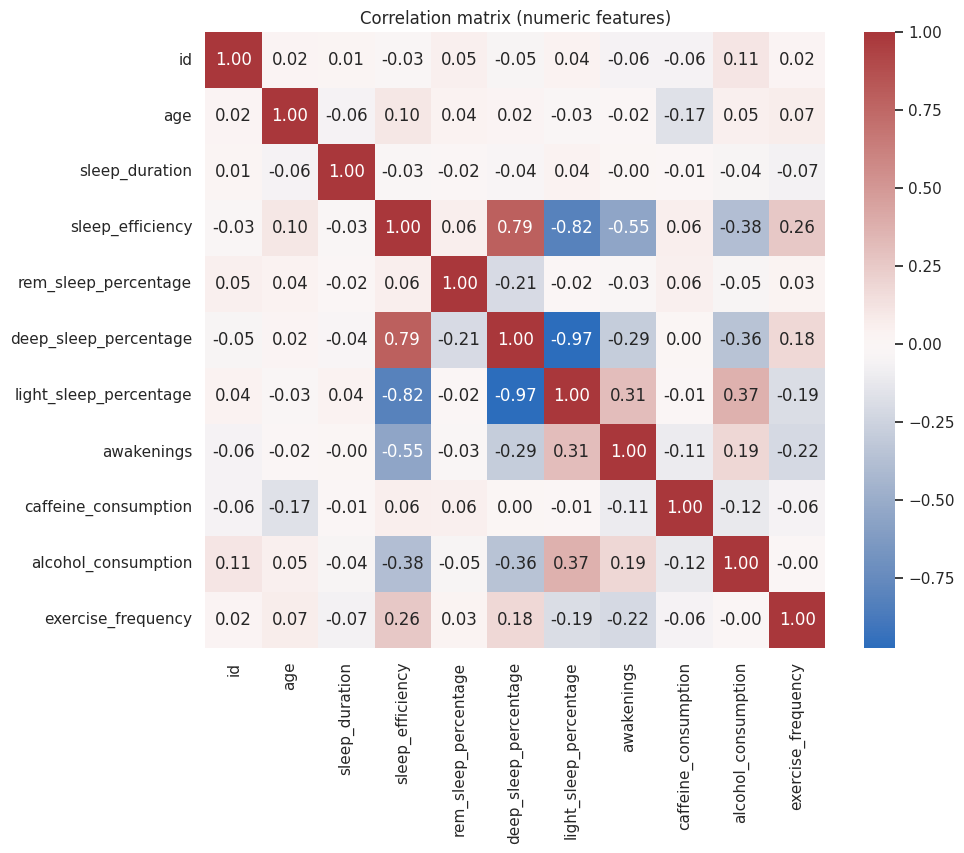

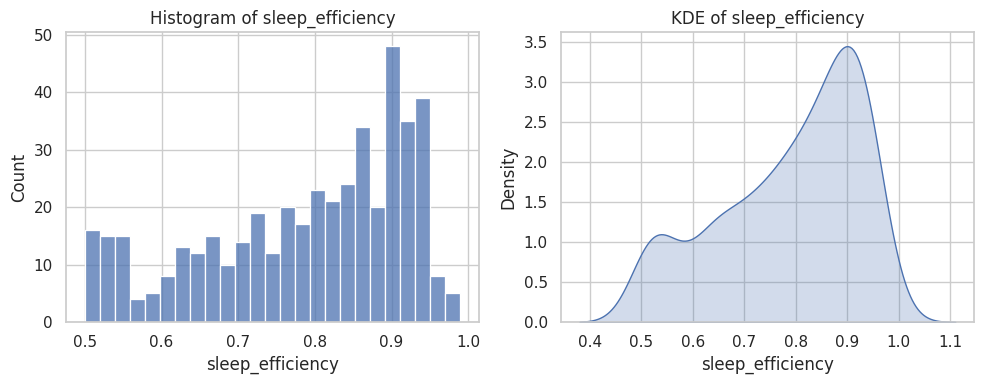

sleep_efficiency: IQR=0.203, lower=0.394, upper=1.204, outliers_count=0
------------------------------------------------------------


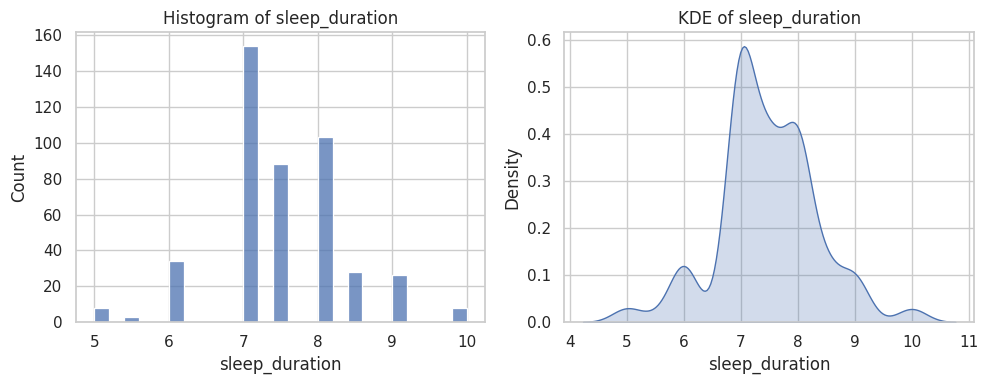

sleep_duration: IQR=1.000, lower=5.500, upper=9.500, outliers_count=16
------------------------------------------------------------


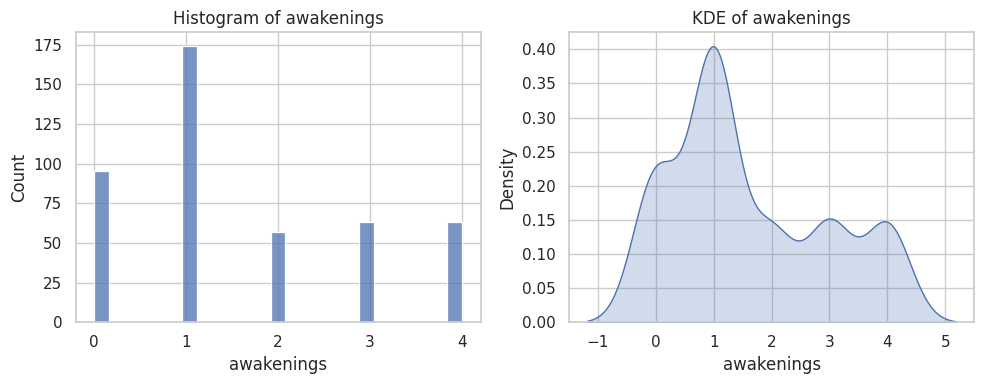

awakenings: IQR=2.000, lower=-2.000, upper=6.000, outliers_count=0
------------------------------------------------------------


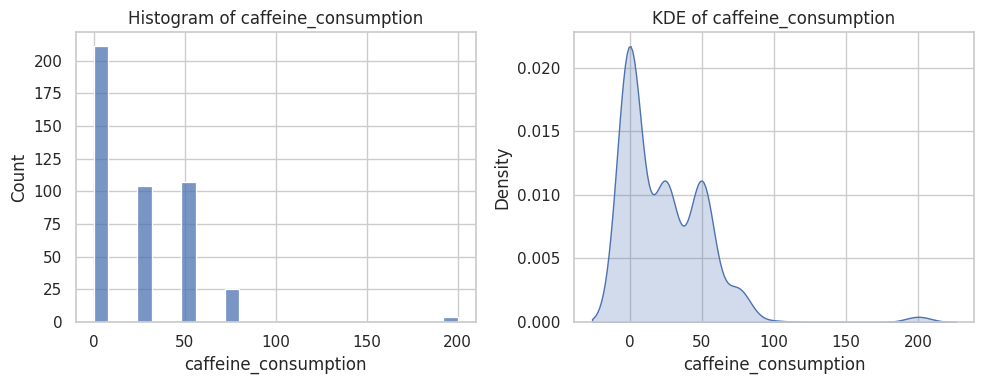

caffeine_consumption: IQR=50.000, lower=-75.000, upper=125.000, outliers_count=4
------------------------------------------------------------
Категориальные признаки: ['gender', 'smoking_status', 'age_group']

Crosstab gender x smoking_status (counts):


smoking_status,No,Yes,All
gender,,,
Female,163,61,224
Male,135,93,228
All,298,154,452



Crosstab gender x smoking_status (row-wise %):


smoking_status,No,Yes
gender,,
Female,0.728,0.272
Male,0.592,0.408



Crosstab gender x low_eff (row-wise %):


low_eff,low
gender,
Female,1.000
Male,1.000



Crosstab smoking_status x exercise_bin (row-wise %):


exercise_bin,none,low,medium,high
smoking_status,,,,
No,0.285,0.188,0.114,0.413
Yes,0.201,0.266,0.169,0.364


Размеры групп (smokers/non-smokers): 154 298
Levene test for equal variances: stat=57.642, p=0.0000
T-test (smokers vs non-smokers): t=-5.705, p=0.0000

Chi2 test gender x low_eff:
chi2=0.000, p=1.0000, dof=0
Observed table:


low_eff,low
gender,
Female,224
Male,228


Expected frequencies:


low_eff,low
gender,
Female,224.000
Male,228.000



T-test (exercise >=3 vs <3): t=4.078, p=0.0001
sizes: 179 273

Ключевые статистические показатели
Средняя sleep_efficiency: 0.789
Медиана sleep_efficiency: 0.820
Std sleep_efficiency: 0.135
Skewness sleep_efficiency: -0.650


In [ ]:
# Статистический анализ данных

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Настройки отображения
pd.options.display.float_format = '{:.3f}'.format
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (8,5)

# Быстрая проверка
print("Размер данных:", df.shape)
display(df.head(3))


# 1) Основные статистические показатели

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Числовые признаки:", num_cols)

# describe (count, mean, std, min, 25%, 50%, 75%, max)
desc = df[num_cols].describe().T
display(desc)

modes = df[num_cols].mode().iloc[0]

summary_stats = pd.DataFrame({
    'mean': df[num_cols].mean(),
    'median': df[num_cols].median(),
    'mode': modes,
    'std': df[num_cols].std(),
    'skew': df[num_cols].skew(),
    'kurtosis': df[num_cols].kurtosis(),
    'q01': df[num_cols].quantile(0.01),
    'q99': df[num_cols].quantile(0.99)
})
display(summary_stats)


# 2) Корреляционная матрица

corr = df[num_cols].corr()
print("Корреляционная матрица:")
display(corr)

# Выявим пары с abs(corr) >= 0.7
high_corr_pairs = []
for i, a in enumerate(num_cols):
    for j, b in enumerate(num_cols):
        if j <= i: continue
        val = corr.loc[a,b]
        if abs(val) >= 0.7:
            high_corr_pairs.append((a,b,val))
high_corr_pairs = sorted(high_corr_pairs, key=lambda x: -abs(x[2]))
print("Пары с |corr| >= 0.7:")
for a,b,v in high_corr_pairs:
    print(f"  {a} <-> {b} : {v:.3f}")

# Тепловая карта
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag', center=0)
plt.title('Correlation matrix (numeric features)')
plt.show()


# 3) Анализ распределений (гистограммы, KDE) + поиск выбросов

plot_cols = ['sleep_efficiency', 'sleep_duration', 'awakenings', 'caffeine_consumption']
for col in plot_cols:
    if col not in df.columns:
        continue
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col].dropna(), bins=25, kde=False)
    plt.title(f'Histogram of {col}')
    plt.subplot(1,2,2)
    sns.kdeplot(df[col].dropna(), fill=True)
    plt.title(f'KDE of {col}')
    plt.tight_layout()
    plt.show()

    # Детекция выбросов: IQR
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    print(f"{col}: IQR={iqr:.3f}, lower={lower:.3f}, upper={upper:.3f}, outliers_count={len(outliers)}")
    print('-'*60)


# 4) Таблицы сопряженности для категориальных признаков

cat_cols = [c for c in df.columns if df[c].dtype.name == 'category' or df[c].dtype == object]
print("Категориальные признаки:", cat_cols)

# gender vs smoking_status
ct1 = pd.crosstab(df['gender'], df['smoking_status'], margins=True)
ct1_pct = pd.crosstab(df['gender'], df['smoking_status'], normalize='index').round(3)
print("\nCrosstab gender x smoking_status (counts):")
display(ct1)
print("\nCrosstab gender x smoking_status (row-wise %):")
display(ct1_pct)

# gender vs low_efficiency (create categorical low/high)
df['low_eff'] = (df['sleep_efficiency'] < 80).map({True:'low', False:'ok'})
ct2 = pd.crosstab(df['gender'], df['low_eff'], normalize='index').round(3)
print("\nCrosstab gender x low_eff (row-wise %):")
display(ct2)

# smoking_status vs exercise_frequency (binned exercise)
df['exercise_bin'] = pd.cut(df['exercise_frequency'], bins=[-1,0,1,2,5], labels=['none','low','medium','high'])
ct3 = pd.crosstab(df['smoking_status'], df['exercise_bin'], normalize='index').round(3)
print("\nCrosstab smoking_status x exercise_bin (row-wise %):")
display(ct3)

# 5) Проверка гипотез

# Гипотеза 1 (t-test): средняя sleep_efficiency у курящих (yes) и некурящих (no) различается
group_yes = df[df['smoking_status'].str.lower() == 'yes']['sleep_efficiency'].dropna()
group_no  = df[df['smoking_status'].str.lower() == 'no']['sleep_efficiency'].dropna()
print("Размеры групп (smokers/non-smokers):", len(group_yes), len(group_no))

# Проверка равенства дисперсий (Levene)
leven_stat, leven_p = stats.levene(group_yes, group_no)
print(f"Levene test for equal variances: stat={leven_stat:.3f}, p={leven_p:.4f}")

# Выбираем тип t-test в зависимости от Levene
tt_stat, tt_p = stats.ttest_ind(group_yes, group_no, equal_var=(leven_p>0.05))
print(f"T-test (smokers vs non-smokers): t={tt_stat:.3f}, p={tt_p:.4f}")

# Гипотеза 2 (chi-square): есть ли связь между полом и низкой эффективностью (low_eff)
cont = pd.crosstab(df['gender'], df['low_eff'])
chi2, p_chi, dof, ex = stats.chi2_contingency(cont)
print("\nChi2 test gender x low_eff:")
print("chi2={:.3f}, p={:.4f}, dof={}".format(chi2, p_chi, dof))
print("Observed table:")
display(cont)
print("Expected frequencies:")
display(pd.DataFrame(ex, index=cont.index, columns=cont.columns).round(2))

# Доп. гипотеза 3 (t-test): эффективность у тех, кто exercises >=3 vs <3
group_active = df[df['exercise_frequency'] >= 3]['sleep_efficiency'].dropna()
group_inactive = df[df['exercise_frequency'] < 3]['sleep_efficiency'].dropna()
t2_stat, t2_p = stats.ttest_ind(group_active, group_inactive, equal_var=False)
print(f"\nT-test (exercise >=3 vs <3): t={t2_stat:.3f}, p={t2_p:.4f}")
print("sizes:", len(group_active), len(group_inactive))


print("\nКлючевые статистические показатели")
print("Средняя sleep_efficiency: {:.3f}".format(df['sleep_efficiency'].mean()))
print("Медиана sleep_efficiency: {:.3f}".format(df['sleep_efficiency'].median()))
print("Std sleep_efficiency: {:.3f}".format(df['sleep_efficiency'].std()))
print("Skewness sleep_efficiency: {:.3f}".format(df['sleep_efficiency'].skew()))

#**Графический анализ данных**

##Визуализация с помощью Matplotlib

###1.   Гистограмма распределения сна

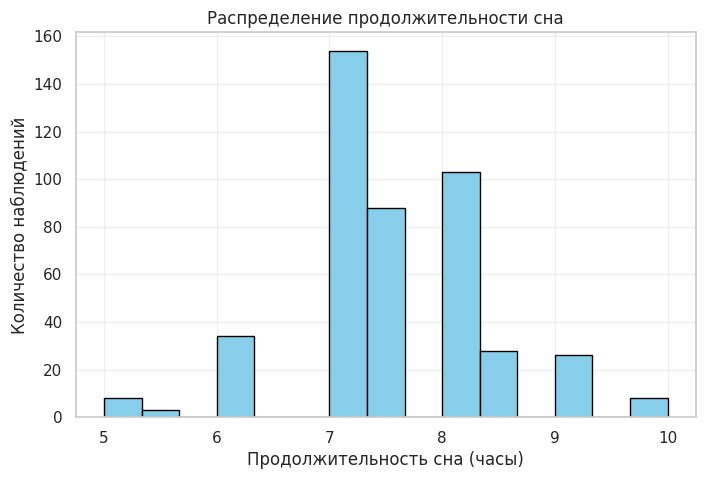

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df['sleep_duration'], bins=15, color='skyblue', edgecolor='black')
plt.title('Распределение продолжительности сна')
plt.xlabel('Продолжительность сна (часы)')
plt.ylabel('Количество наблюдений')
plt.grid(alpha=0.3)
plt.show()

###2. Диаграмма рассеяния: эффективность сна vs продолжительность сна

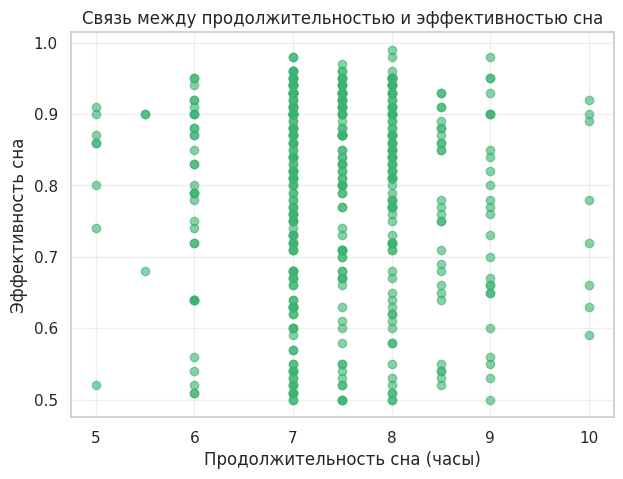

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(df['sleep_duration'], df['sleep_efficiency'], color='mediumseagreen', alpha=0.6)
plt.title('Связь между продолжительностью и эффективностью сна')
plt.xlabel('Продолжительность сна (часы)')
plt.ylabel('Эффективность сна')
plt.grid(alpha=0.3)
plt.show()

###3. Круговая диаграмма: доля курящих и некурящих

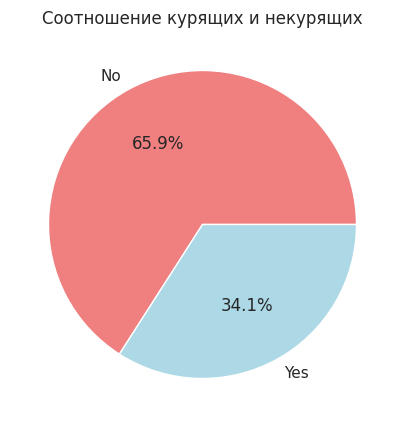

In [ ]:
smoking_counts = df['smoking_status'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(smoking_counts, labels=smoking_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Соотношение курящих и некурящих')
plt.show()

##Визуализация с помощью Seaborn
###1.   Boxplot (ящик с усами) эффективности сна по полу

/tmp/ipython-input-3840533460.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='sleep_efficiency', data=df, palette='pastel')


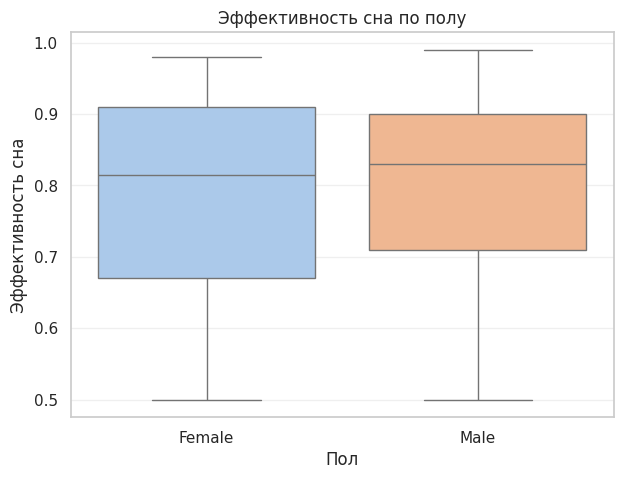

In [ ]:
import seaborn as sns

plt.figure(figsize=(7,5))
sns.boxplot(x='gender', y='sleep_efficiency', data=df, palette='pastel')
plt.title('Эффективность сна по полу')
plt.xlabel('Пол')
plt.ylabel('Эффективность сна')
plt.grid(axis='y', alpha=0.3)
plt.show()

###2. Тепловая карта корреляций

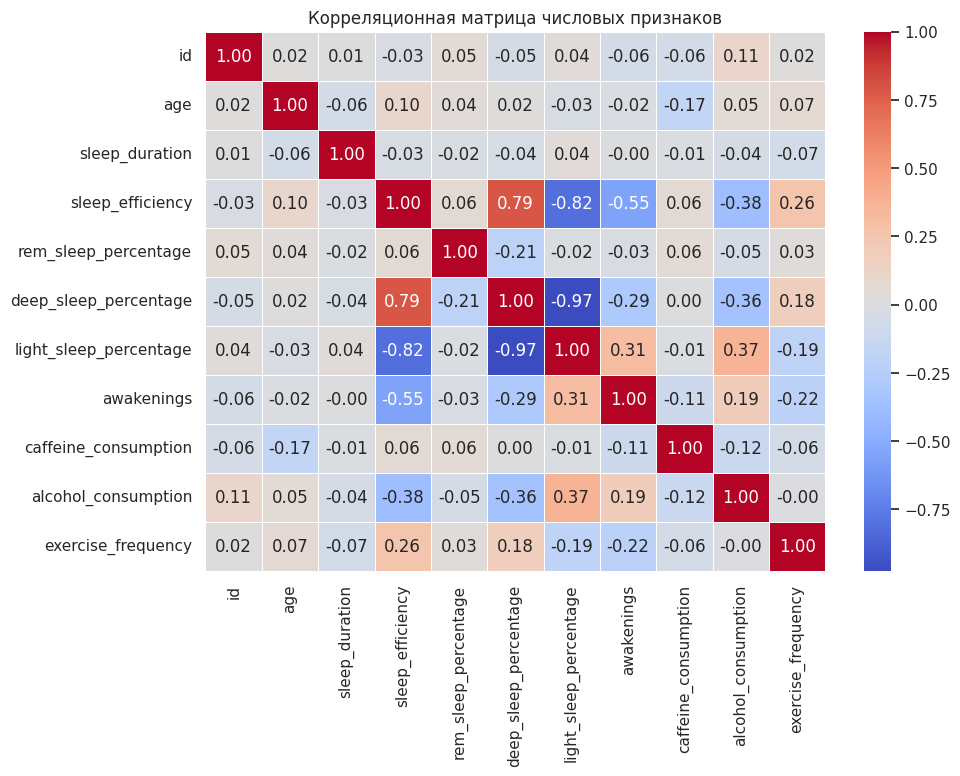

In [ ]:
plt.figure(figsize=(10,7))
corr = df.select_dtypes('number').corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Корреляционная матрица числовых признаков')
plt.show()